In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-products-sales-performance/Computed insight - Success of active sellers.csv
/kaggle/input/summer-products-sales-performance/summer-products-with-rating-and-performance_2020-08.csv
/kaggle/input/summer-products-sales-performance/unique-categories.sorted-by-count.csv
/kaggle/input/summer-products-sales-performance/unique-categories.csv


In [2]:
# Importing and inspecting dataset quality.
summer_products = pd.read_csv('/kaggle/input/summer-products-sales-performance/summer-products-with-rating-and-performance_2020-08.csv')
summer_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         1573 non-null   int64  
 1   title                         1573 non-null   object 
 2   title_orig                    1573 non-null   object 
 3   price                         1573 non-null   float64
 4   retail_price                  1573 non-null   int64  
 5   currency_buyer                1573 non-null   object 
 6   units_sold                    1573 non-null   int64  
 7   uses_ad_boosts                1573 non-null   int64  
 8   rating                        1573 non-null   float64
 9   rating_count                  1573 non-null   int64  
 10  rating_five_count             1528 non-null   float64
 11  rating_four_count             1528 non-null   float64
 12  rating_three_count            1528 non-null   float64
 13  rat

# **Cleaning the Dataset**

In [3]:
# Drop unneeded columns.
summer_products = summer_products.drop(['crawl_month', 'product_picture', 'product_url', 'merchant_profile_picture', 'merchant_has_profile_picture', 'merchant_info_subtitle',
                                       'urgency_text', 'has_urgency_banner', 'merchant_title', 'theme', 'has_urgency_banner', 'shipping_is_express', 'shipping_option_price',
                                       'shipping_option_name', 'product_variation_inventory', 'product_variation_size_id', 'badges_count', 'badge_product_quality', 'badge_fast_shipping', 'badge_local_product', 'title_orig'], axis = 1)
summer_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  1573 non-null   int64  
 1   title                  1573 non-null   object 
 2   price                  1573 non-null   float64
 3   retail_price           1573 non-null   int64  
 4   currency_buyer         1573 non-null   object 
 5   units_sold             1573 non-null   int64  
 6   uses_ad_boosts         1573 non-null   int64  
 7   rating                 1573 non-null   float64
 8   rating_count           1573 non-null   int64  
 9   rating_five_count      1528 non-null   float64
 10  rating_four_count      1528 non-null   float64
 11  rating_three_count     1528 non-null   float64
 12  rating_two_count       1528 non-null   float64
 13  rating_one_count       1528 non-null   float64
 14  tags                   1573 non-null   object 
 15  prod

In [4]:
# Replacing NAs for ratings with 0
summer_products['rating_one_count'] = summer_products['rating_one_count'].fillna(0)
summer_products['rating_two_count'] = summer_products['rating_two_count'].fillna(0)
summer_products['rating_three_count'] = summer_products['rating_three_count'].fillna(0)
summer_products['rating_four_count'] = summer_products['rating_four_count'].fillna(0)
summer_products['rating_five_count'] = summer_products['rating_five_count'].fillna(0)

# Replacing NAs with Unknown for other columns
summer_products['product_color'] = summer_products['product_color'].fillna('unknown')
summer_products['origin_country'] = summer_products['origin_country'].fillna('unknown')
summer_products['origin_country'] = summer_products['origin_country'].fillna('unknown')
summer_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  1573 non-null   int64  
 1   title                  1573 non-null   object 
 2   price                  1573 non-null   float64
 3   retail_price           1573 non-null   int64  
 4   currency_buyer         1573 non-null   object 
 5   units_sold             1573 non-null   int64  
 6   uses_ad_boosts         1573 non-null   int64  
 7   rating                 1573 non-null   float64
 8   rating_count           1573 non-null   int64  
 9   rating_five_count      1573 non-null   float64
 10  rating_four_count      1573 non-null   float64
 11  rating_three_count     1573 non-null   float64
 12  rating_two_count       1573 non-null   float64
 13  rating_one_count       1573 non-null   float64
 14  tags                   1573 non-null   object 
 15  prod

In [5]:
# Ensuring all the unknown merchant_names belong to a single merchant_id
merchant_chk = summer_products.loc[summer_products['merchant_name'].isna()]
print(merchant_chk[['merchant_name', 'merchant_id']])

     merchant_name               merchant_id
408            NaN  5aab3c8ea6bf7a704caec65c
505            NaN  5aab3c8ea6bf7a704caec65c
1103           NaN  5aab3c8ea6bf7a704caec65c
1350           NaN  5aab3c8ea6bf7a704caec65c


In [6]:
# Replacing merchant_name with unknown
summer_products['merchant_name'] = summer_products['merchant_name'].fillna('unknown')
summer_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  1573 non-null   int64  
 1   title                  1573 non-null   object 
 2   price                  1573 non-null   float64
 3   retail_price           1573 non-null   int64  
 4   currency_buyer         1573 non-null   object 
 5   units_sold             1573 non-null   int64  
 6   uses_ad_boosts         1573 non-null   int64  
 7   rating                 1573 non-null   float64
 8   rating_count           1573 non-null   int64  
 9   rating_five_count      1573 non-null   float64
 10  rating_four_count      1573 non-null   float64
 11  rating_three_count     1573 non-null   float64
 12  rating_two_count       1573 non-null   float64
 13  rating_one_count       1573 non-null   float64
 14  tags                   1573 non-null   object 
 15  prod

In [7]:
summer_products.describe()

,index,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1.573000e+03,1573.000000
mean,786.000000,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,429.611570,174.461538,130.700572,61.888748,92.996821,40.456453,49.821360,2.649583e+04,4.032345
std,454.230301,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,968.882684,395.876511,308.015310,149.539900,211.592341,20.301203,2.562799,7.847446e+04,0.204768
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000e+00,2.333333
25%,393.000000,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,10.000000,4.000000,3.000000,1.000000,3.000000,31.000000,50.000000,1.987000e+03,3.917353
50%,786.000000,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,72.000000,29.000000,22.000000,10.000000,18.000000,40.000000,50.000000,7.936000e+03,4.040650
75%,1179.000000,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,394.000000,163.000000,121.000000,59.000000,90.000000,43.000000,50.000000,2.456400e+04,4.161797
max,1572.000000,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,2789.000000,140.000000,50.000000,2.174765e+06,5.000000


In [8]:
summer_products.head()

,index,title,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,tags,product_color,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_rating_count,merchant_rating,merchant_id,product_id
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,34,50,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,5e9ae51d43d6a96e303acdb0
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,41,50,CN,sarahouse,17752,3.899673,56458aa03a698c35c9050988,58940d436a0d3d5da4e95a38
2,2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,8.00,43,EUR,100,0,3.57,14,5.0,...,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,36,50,CN,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,5ea10e2c617580260d55310a
3,3,Hot Summer Cool T-shirt pour les femmes Mode T...,8.00,8,EUR,5000,1,4.03,579,295.0,...,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,41,50,CN,allenfan,23832,4.020435,58cfdefdacb37b556efdff7c,5cedf17ad1d44c52c59e4aca
4,4,Femmes Shorts d'été à lacets taille élastique ...,2.72,3,EUR,100,1,3.10,20,6.0,...,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,35,50,CN,happyhorses,14482,4.001588,5ab3b592c3911a095ad5dadb,5ebf5819ebac372b070b0e70


In [9]:
# If merchant_rating_count is zero then the merchant_rating should be 'unknown', same for rating_count
summer_products['rating'] = summer_products.apply(lambda x : 0 if x['rating_count'] == 0 else x['rating'], axis = 1)
summer_products['merchant_rating'] = summer_products.apply(lambda x : 0 if x['merchant_rating_count'] == 0 else x['merchant_rating'], axis = 1)

# Points of interest:

* Merchants charging the highest margins vs ratings.
* Ad-boosts vs Products Sold.How does merchant_rating correlate with units_sold?
* Merchant Rating vs Units Sold (sort by top merchants).
* Product Rating vs Units Sold (sort by highest selling products)?
* Avg margin vs rating.
* Origin countries with product counts.

# Merchants charging the highest margins vs ratings.

In [10]:
highest_margins = summer_products.copy()
highest_margins['margin'] = summer_products['retail_price'] - summer_products['price']
highest_margins = highest_margins.groupby('merchant_id').agg({'margin': 'sum', 'merchant_rating': 'mean'}).sort_values(by = 'margin', ascending = False).reset_index()
highest_margins = highest_margins.merge(summer_products[['merchant_name', 'merchant_id']], how = 'inner', on = 'merchant_id').drop_duplicates().reset_index(drop = True).round(2)
highest_margins = highest_margins.iloc[:,[0,3,1,2]]
highest_margins.head(10)

,merchant_id,merchant_name,margin,merchant_rating
0,5e71bc2ff2bef60050bd3a86,wanguanqiuxi,471.0,3.91
1,58131ddf6f55296033923a7c,vvfashion2016,319.0,4.20
2,53facca81c105e3d5866e212,gl,315.0,4.16
3,5b658cbebc3b221445ba1440,pumpkincarriages,304.0,4.08
4,539937d634067e06707b1a8e,hotdress,299.0,3.97
5,5440e3d7f8abc82cbd97b19c,aqlangweigarmentstradingcoltd,282.0,3.91
6,53aa664438d3046ee44a5024,guangzhouchanny,282.0,4.13
7,591c4e7f1a071f13df7a63ff,liwenjuanfashionstore,264.0,4.17
8,596b4085d4cc34162e778769,juxinchengxiu,262.0,4.05
9,53a2a09ad91139519161a267,guangzhouchannytradecoltd,261.0,4.26


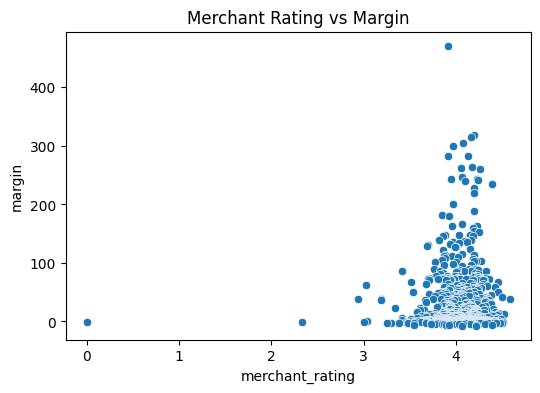

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))

margin_vs_mer_rating = sns.scatterplot(data = highest_margins, x='merchant_rating', y='margin')
margin_vs_mer_rating.set_title('Merchant Rating vs Margin')

plt.show()

# Ad-boosts vs Products Sold

In [12]:
used_adb = summer_products.loc[summer_products['uses_ad_boosts'] == 1]['units_sold'].sum()
notused_adb = summer_products.loc[summer_products['uses_ad_boosts'] == 0]['units_sold'].sum()
difference = notused_adb - used_adb
print(f"The products sold without using ad-boosts was {(difference/used_adb)*100 : .2f}% higher than the products sold using ad-boosts")

The products sold without using ad-boosts was  40.51% higher than the products sold using ad-boosts


# Merchant Rating vs Units Sold (sort by top merchants).

In [13]:
units_sold_mer = summer_products.groupby('merchant_id').agg({'units_sold': 'sum', 'merchant_rating': 'mean'}).sort_values(by = 'units_sold', ascending = False).reset_index()
units_sold_mer = units_sold_mer.merge(summer_products[['merchant_name', 'merchant_id']], how = 'inner', on = 'merchant_id').drop_duplicates().reset_index(drop = True).round(2)
units_sold_mer = units_sold_mer.iloc[:,[0,3,1,2]]
units_sold_mer.head(10)

,merchant_id,merchant_name,units_sold,merchant_rating
0,5357bcf2bb72c5504882e889,primesalecolimited,120000,4.22
1,5708773c3c02161b3f8c7900,leiston,107100,3.93
2,5417aada4ad3ab27e954b76c,shenzhenlongdragontechnologycoltd,100007,4.05
3,53f2beb39020ee03566d6e18,shanghailalanginternationaltradecoltd,100000,4.07
4,53082ea15aefb07dfe1f2a4f,bigcompany,100000,4.04
5,570f3a713a698c14278bb51e,fashionstore0408,100000,3.89
6,5926c5ace8ff5525241b368d,pentiumhorse,96000,4.14
7,5860c757b1e41d4d67d183e8,mermaidskiss,90100,4.05
8,52bd3ddb34067e4620a4c62d,fashionshow,80000,4.10
9,5a7b23a69bda4e3d375e7b3f,f40051ab1zhong9,80000,3.97


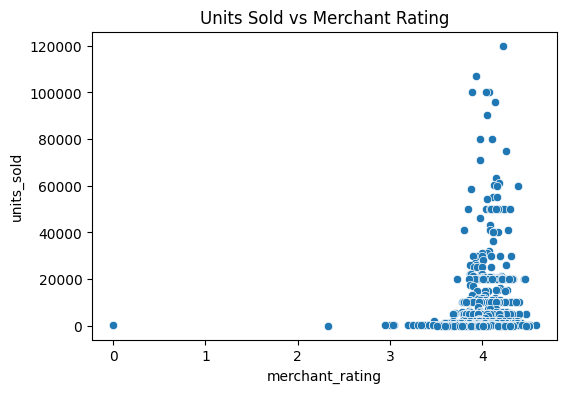

In [14]:
plt.figure(figsize = (6,4))
mer_sell_vs_rating = sns.scatterplot(data = units_sold_mer, x = 'merchant_rating', y = 'units_sold')
mer_sell_vs_rating.set_title('Units Sold vs Merchant Rating')
plt.show()

# Product Rating vs Units Sold (sort by highest selling products)?

In [15]:
units_sold_prod = summer_products.groupby('product_id').agg({'units_sold': 'sum', 'rating': 'mean'}).sort_values(by = 'units_sold', ascending = False).reset_index()
units_sold_prod = units_sold_prod.merge(summer_products[['title', 'product_id']], how = 'inner', on = 'product_id').drop_duplicates().reset_index(drop = True).round(2)
units_sold_prod = units_sold_prod.iloc[:,[0,3,1,2]]
units_sold_prod.head(10)

,product_id,title,units_sold,rating
0,567cb0925ff12c4829f07dfb,Femmes dentelle manches courtes hauts hauts ch...,100000,3.82
1,544b079d1280fa28eee9b380,Femmes Camisole extensible Spaghetti Strap Lon...,100000,4.10
2,5b07a7c6e997b33c6f9947da,2018 New Fashion Women's Tops Sexy Strappy Sle...,100000,3.83
3,54bdf18039b8c045f118936a,Nouveau Aeeival Femmes Vêtements À Manches Lon...,100000,3.76
4,571adeab62cce546f1a46bc0,Nouvelle arrivée femmes été sexy robe de soiré...,100000,3.53
5,53897eeeafddf70c91af1cda,T-shirt à manches courtes en mousseline de soi...,100000,3.98
6,5b17a4cff4979a14e3b4bf7f,Été Femmes Casual Sleeveless T-shirts sans man...,50000,4.12
7,58df3eb809730e54ddd932ca,Summer Women Sexy White Broderie Sexy White De...,50000,3.60
8,5953892749a5f7756941171f,Women's Fashion - Chemise sans manches à encol...,50000,4.00
9,56553387a03eee0826acb151,Sexy Thong Cheeky Bottom Femmes Beachwear Brés...,50000,3.45


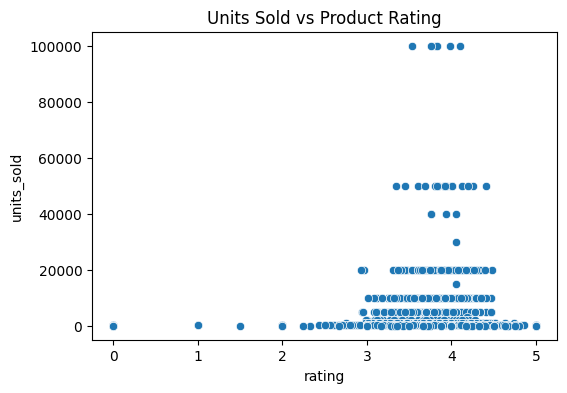

In [16]:
plt.figure(figsize = (6,4))
prod_sell_vs_rating = sns.scatterplot(data = units_sold_prod, x = 'rating', y = 'units_sold')
prod_sell_vs_rating.set_title('Units Sold vs Product Rating')
plt.show()

# Avg margin vs rating.

In [17]:
# Create a column to round the ratings to the nearest integer.
margin_by_rating = summer_products.copy()
margin_by_rating['int_rating'] = summer_products['rating'].round().astype(int)
margin_by_rating['margin'] = margin_by_rating['retail_price'] - margin_by_rating['price']
margin_by_rating = margin_by_rating.groupby('int_rating').agg({'margin': 'mean'}).sort_values(by = 'int_rating', ascending = False).reset_index()
margin_by_rating.head()

,int_rating,margin
0,5,12.918182
1,4,15.355204
2,3,13.631323
3,2,20.899474
4,1,-0.333333


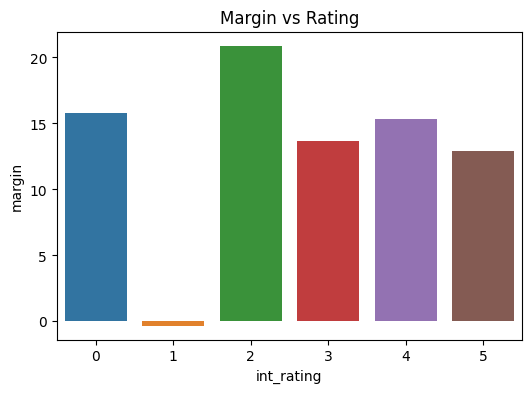

In [18]:
plt.figure(figsize = (6,4))
rating_vs_mar = sns.barplot(data = margin_by_rating, x = 'int_rating', y = 'margin')
rating_vs_mar.set_title('Margin vs Rating')
plt.show()

# Origin countries with product counts.

In [19]:
origin_cnt = summer_products.groupby('origin_country')['units_sold'].count().reset_index(name = 'products_sold').sort_values(by = 'products_sold', ascending = False).reset_index(drop = True)
origin_cnt.head(10)

,origin_country,products_sold
0,CN,1516
1,US,31
2,unknown,17
3,VE,5
4,SG,2
5,AT,1
6,GB,1
